In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#02- Getting Data - Read the .csv file.
data = pd.read_csv("marketing_customer_analysis.csv")

In [3]:
pd.options.display.max_columns = None
data.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [4]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
#03 - Cleaning/Wrangling/EDA
#Change headers names

cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
    
data.columns = cols

data

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor           2/24/11         Employed      F   56274   
1     Bachelor           1/31/11       Unemployed      F       0   
2     Bachelor           2/19/11         Employed      F   48767   
3     Bachelor           1/20/11       Unemployed      M       0   
4     Bachelor            2/3/11         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

In [7]:
#Deal with NaN values.

data.dropna(axis=0, how='any', inplace=False)

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     education effective_to_date employmentstatus gender  income  \
0     Bachelor           2/24/11         Employed      F   56274   
1     Bachelor           1/31/11       Unemployed      F       0   
2     Bachelor           2/19/11         Employed      F   48767   
3     Bachelor           1/20/11       Unemployed      M       0   
4     Bachelor            2/3/11         Employed      M   43836   
...        ...               ...              ...    ...     ...   
9129  Bachelor           2/10/11         Employed      M   71941   
9130   College           2/12/11         Employed      F   21604   
9131  Bachelor            2/6/11       Unemployed      M       0   
9132   College            2/3/11         Employed      M   21941   
9133   College           2/14/11       Unemployed      M       0   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married                    69   
1         Suburban         Single                    94   
2         Suburban        Married                   108   
3         Suburban        Married                   106   
4            Rural         Single                    73   
...            ...            ...                   ...   
9129         Urban        Married                    73   
9130      Suburban       Divorced                    79   
9131      Suburban         Single                    85   
9132      Suburban        Married                    96   
9133      Suburban         Single                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies     policy_type  \
0                             0                   1  Corporate Auto   
1                             0                   8   Personal Auto   
2                             0                   2   Personal Auto   
3                             0                   7  Corporate Auto   
4                             0                   1   Personal Auto   
...                         ...                 ...             ...   
9129                          0                   2   Personal Auto   
9130                          0                   1  Corporate Auto   
9131                          3                   2  Corporate Auto   
9132                          0                   3   Personal Auto   
9133                          0                   1 

In [8]:
#Categorical Features

categorical = data.select_dtypes(include = np.object)

categorical

customer       state response  coverage education effective_to_date  \
0     BU79786  Washington       No     Basic  Bachelor           2/24/11   
1     QZ44356     Arizona       No  Extended  Bachelor           1/31/11   
2     AI49188      Nevada       No   Premium  Bachelor           2/19/11   
3     WW63253  California       No     Basic  Bachelor           1/20/11   
4     HB64268  Washington       No     Basic  Bachelor            2/3/11   
...       ...         ...      ...       ...       ...               ...   
9129  LA72316  California       No     Basic  Bachelor           2/10/11   
9130  PK87824  California      Yes  Extended   College           2/12/11   
9131  TD14365  California       No  Extended  Bachelor            2/6/11   
9132  UP19263  California       No  Extended   College            2/3/11   
9133  Y167826  California       No  Extended   College           2/14/11   

     employmentstatus gender location_code marital_status     policy_type  \
0            Employed      F      Suburban        Married  Corporate Auto   
1          Unemployed      F      Suburban         Single   Personal Auto   
2            Employed      F      Suburban        Married   Personal Auto   
3          Unemployed      M      Suburban        Married  Corporate Auto   
4            Employed      M         Rural         Single   Personal Auto   
...               ...    ...           ...            ...             ...   
9129         Employed      M         Urban        Married   Personal Auto   
9130         Employed      F      Suburban       Divorced  Corporate Auto   
9131       Unemployed      M      Suburban         Single  Corporate Auto   
9132         Employed      M      Suburban        Married   Personal Auto   
9133       Unemployed      M      Suburban         Single  Corporate Auto   

            policy renew_offer_type sales_channel  vehicle_class vehicle_size  
0     Corporate L3           Offer1         Agent   Two-Door Car      Medsize  
1      Personal L3           Offer3         Agent  Four-Door Car      Medsize  
2      Personal L3           Offer1         Agent   Two-Door Car      Medsize  
3     Corporate L2           Offer1   Call Center            SUV      Medsize  
4      Personal L1           Offer1         Agent  Four-Door Car      Medsize  
...            ...              ...           ...            ...          ...  
9129   Personal L1           Offer2           Web  Four-Door Car      Medsize  
9130  Corporate L3           Offer1        Branch  Four-Door Car      Medsize  
9131  Corporate L2           Offer1        Branch  Four-Door Car      Medsize  
9132   Personal L2           Offer3        Branch  Four-Door Car        Large  
9133  Corporate L3           Offer4   Call Center   Two-Door Car      Medsize  

[9134 rows x 16 columns]

In [9]:
#Numerical Features

numerical = data.select_dtypes(include = np.number)

numerical

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

In [10]:
#checking the categorical data
#all seems good and standardized
for column in categorical.columns:
    print(column, categorical[column].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rur

In [11]:
#EDA part
data.describe().apply(lambda x: round(x,2))

customer_lifetime_value    income  monthly_premium_auto  \
count                  9134.00   9134.00               9134.00   
mean                   8004.94  37657.38                 93.22   
std                    6870.97  30379.90                 34.41   
min                    1898.01      0.00                 61.00   
25%                    3994.25      0.00                 68.00   
50%                    5780.18  33889.50                 83.00   
75%                    8962.17  62320.00                109.00   
max                   83325.38  99981.00                298.00   

       months_since_last_claim  months_since_policy_inception  \
count                  9134.00                        9134.00   
mean                     15.10                          48.06   
std                      10.07                          27.91   
min                       0.00                           0.00   
25%                       6.00                          24.00   
50%                      14.00                          48.00   
75%                      23.00                          71.00   
max                      35.00                          99.00   

       number_of_open_complaints  number_of_policies  total_claim_amount  
count                    9134.00             9134.00             9134.00  
mean                        0.38                2.97              434.09  
std                         0.91                2.39              290.50  
min                         0.00                1.00                0.10  
25%                         0.00                1.00              272.26  
50%                         0.00                2.00              383.95  
75%                         0.00                4.00              547.51  
max                         5.00                9.00             2893.24

In [12]:
data.select_dtypes(np.number)

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

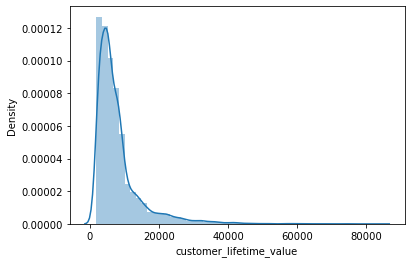

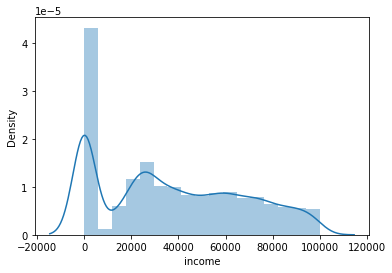

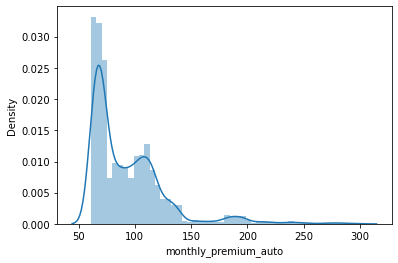

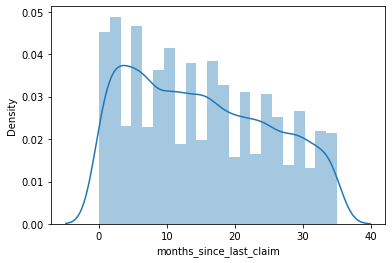

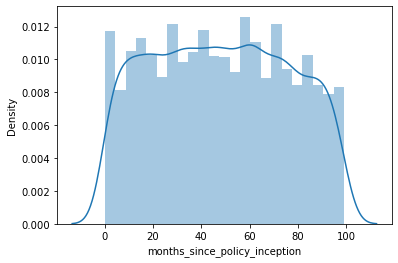

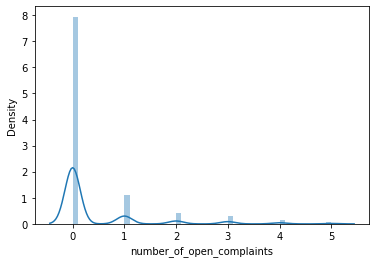

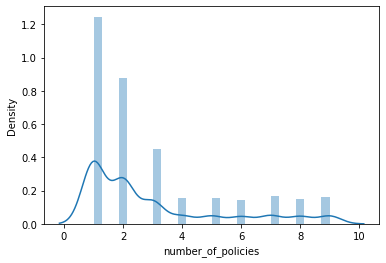

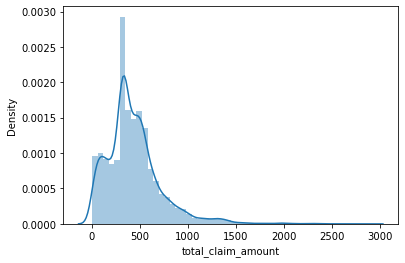

In [13]:
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

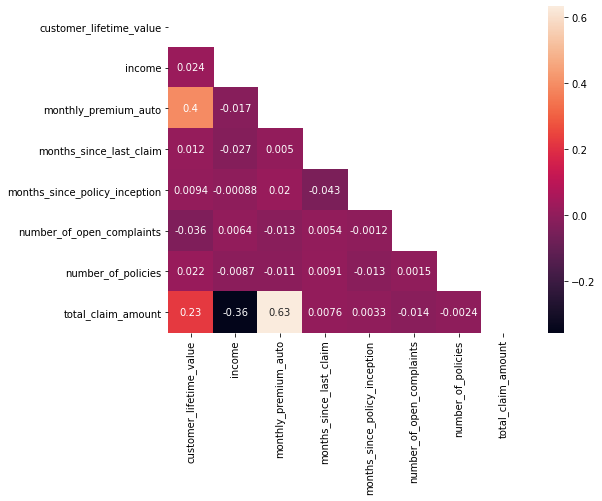

In [14]:
# check the correlations
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True #hiding repeat half of the matrix

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

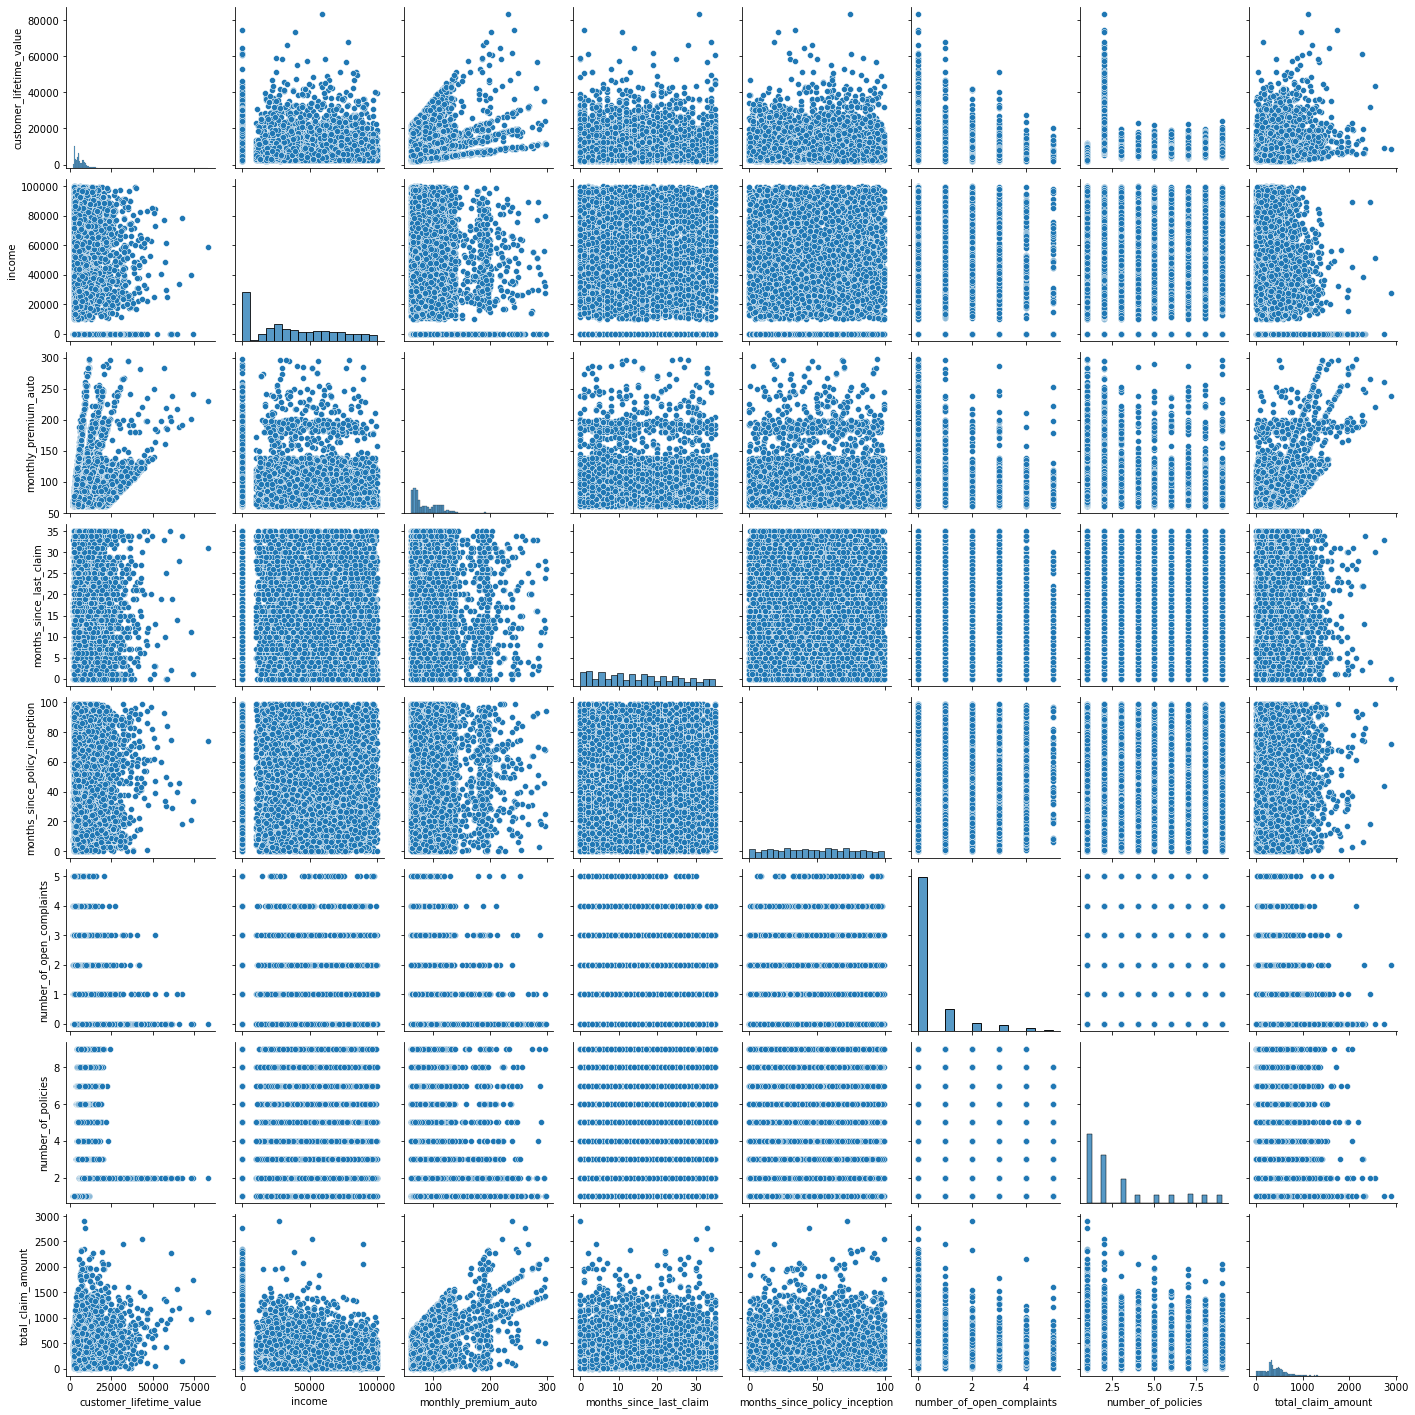

In [15]:
#covariance
sns.pairplot(data)

In [16]:
def boxcox_transform(data):
    numeric_cols = data.select_dtypes(np.number).columns #separate into numeric columns
    _ci = {column: None for column in numeric_cols} #it will generate this dictionary
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        data[column] = np.where(data[column]<=0, np.NAN, data[column]) 
        data[column] = data[column].fillna(data[column].mean()) #MAYBE KEEP THE NUMBERS NEGative IS IMPORTAT
        transformed_data, ci = stats.boxcox(data[column])
        data[column] = transformed_data
        _ci[column] = [ci] 
    return data, _ci

In [17]:
data, _ci = boxcox_transform(data)
data

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington                 2.703839       No     Basic   
1     QZ44356     Arizona                 2.754926       No  Extended   
2     AI49188      Nevada                 2.780772       No   Premium   
3     WW63253  California                 2.759125       No     Basic   
4     HB64268  Washington                 2.704995       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California                 2.801170       No     Basic   
9130  PK87824  California                 2.711030      Yes  Extended   
9131  TD14365  California                 2.762062       No  Extended   
9132  UP19263  California                 2.758397       No  Extended   
9133  Y167826  California                 2.700165       No  Extended   

     education effective_to_date employmentstatus gender       income  \
0     Bachelor           2/24/11         Employed      F  1247.937066   
1     Bachelor           1/31/11       Unemployed      F  1167.961720   
2     Bachelor           2/19/11         Employed      F  1144.063081   
3     Bachelor           1/20/11       Unemployed      M  1167.961720   
4     Bachelor            2/3/11         Employed      M  1072.375744   
...        ...               ...              ...    ...          ...   
9129  Bachelor           2/10/11         Employed      M  1448.531450   
9130   College           2/12/11         Employed      F   697.790558   
9131  Bachelor            2/6/11       Unemployed      M  1167.961720   
9132   College            2/3/11         Employed      M   704.383672   
9133   College           2/14/11       Unemployed      M  1167.961720   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married              0.685347   
1         Suburban         Single              0.685871   
2         Suburban        Married              0.686039   
3         Suburban        Married              0.686018   
4            Rural         Single              0.685461   
...            ...            ...                   ...   
9129         Urban        Married              0.685461   
9130      Suburban       Divorced              0.685606   
9131      Suburban         Single              0.685725   
9132      Suburban        Married              0.685898   
9133      Suburban         Single              0.685560   

      months_since_last_claim  months_since_policy_inception  \
0                   10.876059                       3.017887   
1                    5.808248                      18.780377   
2                    7.347815                      17.389171   
3                    7.347815                      26.160800   
4                    5.471294                      19.461641   
...                       ...                            ...   
9129                 7.347815                      33.090025   
9130                 6.134207                      13.709541   
9131                 4.379465                      17.034934   
9132                11.319628                       1.667871   
9133                 1.526503                      33.366155   

      number_of_open_complaints  number_of_policies     policy_type  \
0                      0.648045            0.000000  Corporate Auto   
1                      0.648045            1.424359   Personal Auto   
2                      0.648045            0.607328   Personal Auto   
3                      0.648045            1.363462  Corporate Auto   
4                      0.648045            0.000000   Personal Auto   
...                         ...                 ...             ...   
9129                   0.648045            0.607328   Personal Auto   
9130                   0.648045            0.000000  Corporate Auto   
9131                   1.176115            0.607328  Corporate Auto   
9132                   0.648045            0.893486   Personal 

In [18]:
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [19]:
data01 = data.copy()

data01 = remove_outliers(data01, threshold=2, skip_columns=['number_of_open_complaints'])

data01

customer       state  customer_lifetime_value response  coverage  \
0     BU79786  Washington                 2.703839       No     Basic   
1     QZ44356     Arizona                 2.754926       No  Extended   
2     AI49188      Nevada                 2.780772       No   Premium   
3     WW63253  California                 2.759125       No     Basic   
4     HB64268  Washington                 2.704995       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California                 2.801170       No     Basic   
9130  PK87824  California                 2.711030      Yes  Extended   
9131  TD14365  California                 2.762062       No  Extended   
9132  UP19263  California                 2.758397       No  Extended   
9133  Y167826  California                 2.700165       No  Extended   

     education effective_to_date employmentstatus gender       income  \
0     Bachelor           2/24/11         Employed      F  1247.937066   
1     Bachelor           1/31/11       Unemployed      F  1167.961720   
2     Bachelor           2/19/11         Employed      F  1144.063081   
3     Bachelor           1/20/11       Unemployed      M  1167.961720   
4     Bachelor            2/3/11         Employed      M  1072.375744   
...        ...               ...              ...    ...          ...   
9129  Bachelor           2/10/11         Employed      M  1448.531450   
9130   College           2/12/11         Employed      F   697.790558   
9131  Bachelor            2/6/11       Unemployed      M  1167.961720   
9132   College            2/3/11         Employed      M   704.383672   
9133   College           2/14/11       Unemployed      M  1167.961720   

     location_code marital_status  monthly_premium_auto  \
0         Suburban        Married              0.685347   
1         Suburban         Single              0.685871   
2         Suburban        Married              0.686039   
3         Suburban        Married              0.686018   
4            Rural         Single              0.685461   
...            ...            ...                   ...   
9129         Urban        Married              0.685461   
9130      Suburban       Divorced              0.685606   
9131      Suburban         Single              0.685725   
9132      Suburban        Married              0.685898   
9133      Suburban         Single              0.685560   

      months_since_last_claim  months_since_policy_inception  \
0                   10.876059                       3.017887   
1                    5.808248                      18.780377   
2                    7.347815                      17.389171   
3                    7.347815                      26.160800   
4                    5.471294                      19.461641   
...                       ...                            ...   
9129                 7.347815                      33.090025   
9130                 6.134207                      13.709541   
9131                 4.379465                      17.034934   
9132                11.319628                       1.667871   
9133                 1.526503                      33.366155   

      number_of_open_complaints  number_of_policies     policy_type  \
0                      0.648045            0.000000  Corporate Auto   
1                      0.648045            1.424359   Personal Auto   
2                      0.648045            0.607328   Personal Auto   
3                      0.648045            1.363462  Corporate Auto   
4                      0.648045            0.000000   Personal Auto   
...                         ...                 ...             ...   
9129                   0.648045            0.607328   Personal Auto   
9130                   0.648045            0.000000  Corporate Auto   
9131                   1.176115            0.607328  Corporate Auto   
9132                   0.648045            0.893486   Personal 

In [20]:
data = pd.get_dummies(data01, drop_first=True)
data

customer_lifetime_value       income  monthly_premium_auto  \
0                    2.703839  1247.937066              0.685347   
1                    2.754926  1167.961720              0.685871   
2                    2.780772  1144.063081              0.686039   
3                    2.759125  1167.961720              0.686018   
4                    2.704995  1072.375744              0.685461   
...                       ...          ...                   ...   
9129                 2.801170  1448.531450              0.685461   
9130                 2.711030   697.790558              0.685606   
9131                 2.762062  1167.961720              0.685725   
9132                 2.758397   704.383672              0.685898   
9133                 2.700165  1167.961720              0.685560   

      months_since_last_claim  months_since_policy_inception  \
0                   10.876059                       3.017887   
1                    5.808248                      18.780377   
2                    7.347815                      17.389171   
3                    7.347815                      26.160800   
4                    5.471294                      19.461641   
...                       ...                            ...   
9129                 7.347815                      33.090025   
9130                 6.134207                      13.709541   
9131                 4.379465                      17.034934   
9132                11.319628                       1.667871   
9133                 1.526503                      33.366155   

      number_of_open_complaints  number_of_policies  total_claim_amount  \
0                      0.648045            0.000000           33.035752   
1                      0.648045            1.424359           56.357614   
2                      0.648045            0.607328           40.071789   
3                      0.648045            1.363462           38.763252   
4                      0.648045            0.000000           19.560154   
...                         ...                 ...                 ...   
9129                   0.648045            0.607328           23.588905   
9130                   0.648045            0.000000           32.792951   
9131                   1.176115            0.607328           47.263726   
9132                   0.648045            0.893486           44.225147   
9133                   0.648045            0.000000           32.373107   

      customer_AA11235  customer_AA16582  customer_AA30683  customer_AA34092  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...   
9129                 0                 0                 0                 0   
9130                 0                 0                 0                 0   
9131                 0                 0                 0                 0   
9132                 0                 0                 0                 0   
9133                 0                 0                 0                 0   

      customer_AA35519  customer_AA56476  customer_AA69265  customer_AA71604  \
0                    0                 0                 0                 0   
1                    0                 0                 0                 0   
2                    0                 0                 0                 0   
3                    0                 0                 0                 0   
4                    0                 0                 0                 0   
...                ...               ...               ...               ...  

In [21]:
X = data.drop('monthly_premium_auto', axis=1)
y = data['monthly_premium_auto']

#different columns to train and test to get more accurate results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
predictions = model.predict(X_test)

In [25]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.89346031477924, 0.00011114006982036975, 0.00013076794721708155)

In [26]:
from scipy.special import inv_boxcox

predictions = inv_boxcox(predictions, _ci['monthly_premium_auto'])
the_rest = inv_boxcox(y_test,_ci['monthly_premium_auto'])

In [27]:
import math

results = pd.DataFrame()
results['true'] = inv_boxcox(y_test, _ci['monthly_premium_auto'])
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

true        pred       resid
2623  199.0  144.830211   54.169789
6441   65.0   66.286511    1.286511
6953  109.0   99.703202    9.296798
5900   99.0   87.944946   11.055054
3465  109.0  103.062142    5.937858
...     ...         ...         ...
7870  197.0  378.720079  181.720079
2767   65.0   69.072675    4.072675
3091  138.0  145.091230    7.091230
5988   61.0   67.145210    6.145210
8757  119.0  101.342547   17.657453

[2237 rows x 3 columns]

In [28]:
results.sort_values('resid', ascending=False)

true        pred       resid
8389  212.0  524.822083  312.822083
1200  239.0  534.223113  295.223113
7223  211.0  483.888611  272.888611
9026  213.0  481.345045  268.345045
6584  219.0  482.503778  263.503778
...     ...         ...         ...
3271   68.0   68.008723    0.008723
2225  276.0         NaN         NaN
496   276.0         NaN         NaN
8099  283.0         NaN         NaN
1516  287.0         NaN         NaN

[2237 rows x 3 columns]

In [29]:
results[results['true'] >= 40]

true        pred       resid
2623  199.0  144.830211   54.169789
6441   65.0   66.286511    1.286511
6953  109.0   99.703202    9.296798
5900   99.0   87.944946   11.055054
3465  109.0  103.062142    5.937858
...     ...         ...         ...
7870  197.0  378.720079  181.720079
2767   65.0   69.072675    4.072675
3091  138.0  145.091230    7.091230
5988   61.0   67.145210    6.145210
8757  119.0  101.342547   17.657453

[2237 rows x 3 columns]

In [30]:
results.describe()

true         pred        resid
count  2237.000000  2233.000000  2233.000000
mean     91.536880    94.528884    11.434918
std      31.004502    48.939218    26.054264
min      61.000000    65.702672     0.008723
25%      68.000000    68.464997     2.541411
50%      82.000000    82.900022     5.085542
75%     109.000000   100.497678     9.995778
max     287.000000   534.223113   312.822083

<AxesSubplot:xlabel='true', ylabel='pred'>

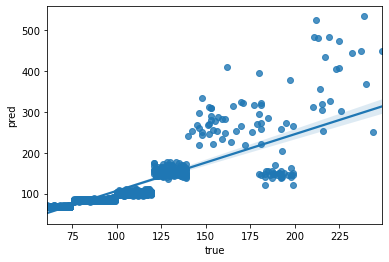

In [31]:
sns.regplot(results['true'], results['pred'])